# CSC713M Problem Set - Supervised and Unsupervised Learning

### Importing the libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, confusion_matrix
from minisom import MiniSom

### Loading the dataset

In [36]:
# Load the dataset
data = pd.read_csv('animal_dataset.csv')
data.head()

,hair,scales,feather,moist skin,sexual reproduction,asexual reproduction,vivipirous,oviparous,hard-shelled eggs,soft eggs,...,antennae,tail,venomous,aquatic,terrestrial,airborne,asymmetrical,symmetrical,Class,Name
0,0,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,Amphibians,african clawed flog
1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,black toad
2,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,boreal toad
3,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,bronze frog
4,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,cane toad


### Splitting the dataset

In [37]:
# Split into features and target variable
X = data.drop(['Class', 'Name'], axis=1)
y = data['Class']

# Convert categorical labels into numerical values
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Helper Functions

In [38]:
# Helper function to calculate metrics and display results
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(model, X_test, y_test, cv=5, scoring=scoring)
    
    print(f"Metrics for {model_name}:")
    print("Accuracy:", cv_results['test_accuracy'].mean())
    print("Precision:", cv_results['test_precision_macro'].mean())
    print("Recall:", cv_results['test_recall_macro'].mean())
    print("F1 Score:", cv_results['test_f1_macro'].mean())
    
    # Fit the model on the entire training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - ' + model_name)
    plt.show()

## Supervised Learning
### Logistic Regression

/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Metrics for Logistic Regression:
Accuracy: 0.9846153846153847
Precision: 0.9916666666666666
Recall: 0.9875
F1 Score: 0.9866666666666667


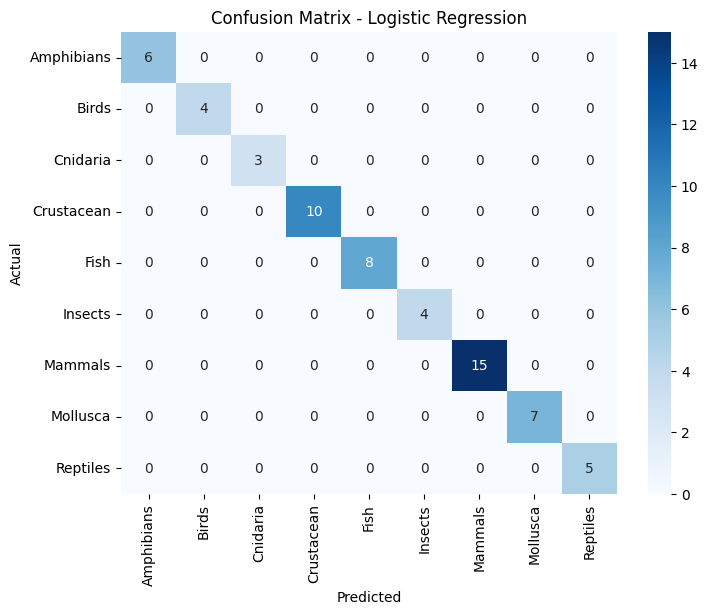

In [39]:
evaluate_model(LogisticRegression(), "Logistic Regression")

### k Nearest Neighbors

/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Metrics for kNN (k=1):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


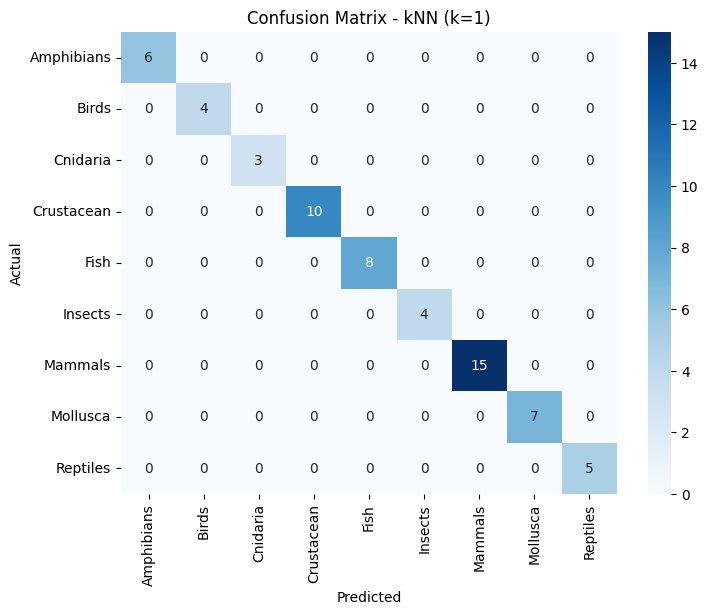

/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: Undefi

Metrics for kNN (k=5):
Accuracy: 0.9371794871794872
Precision: 0.8833333333333332
Recall: 0.9152777777777779
F1 Score: 0.8903703703703704


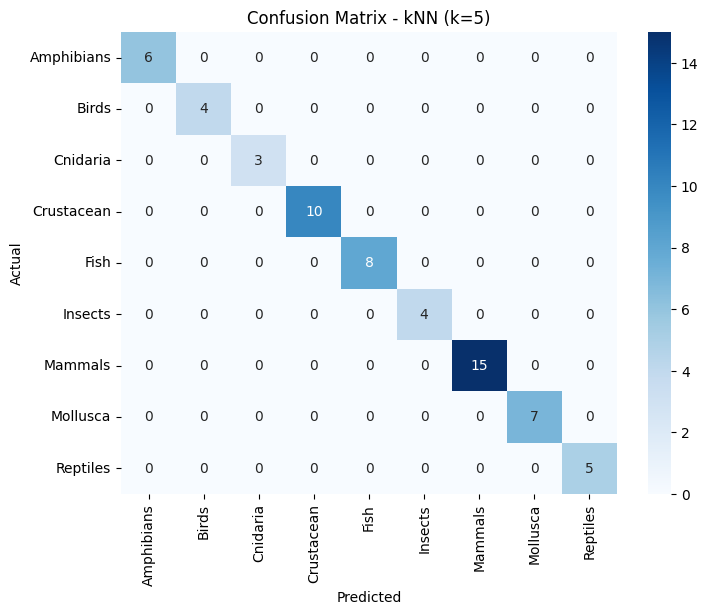

/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: Undefi

Metrics for kNN (k=9):
Accuracy: 0.7897435897435898
Precision: 0.6033333333333333
Recall: 0.6902777777777778
F1 Score: 0.6316203703703703


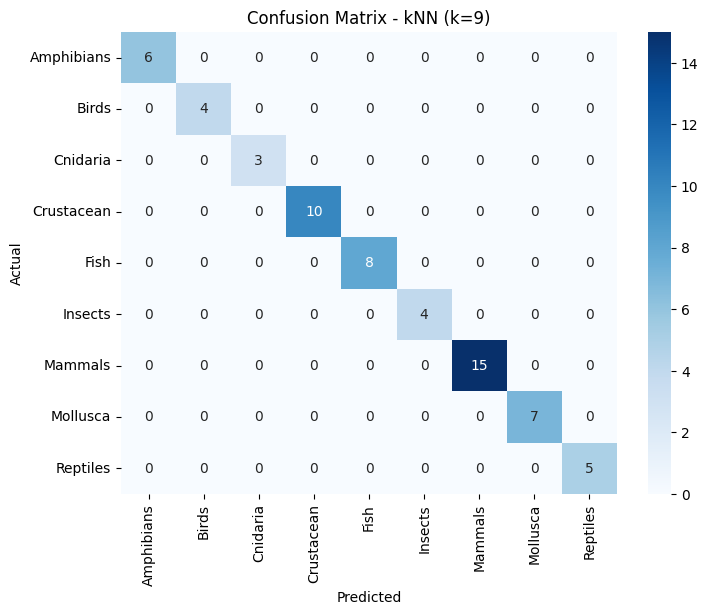

In [40]:
for k in [1, 5, 9]:
    evaluate_model(KNeighborsClassifier(n_neighbors=k), f"kNN (k={k})")

### Multi-layered Perceptron

/Users/kimwilliame/miniconda3/envs/csc713m/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Metrics for Multi-layered Perceptron:
Accuracy: 0.9846153846153847
Precision: 0.9916666666666666
Recall: 0.9875
F1 Score: 0.9866666666666667


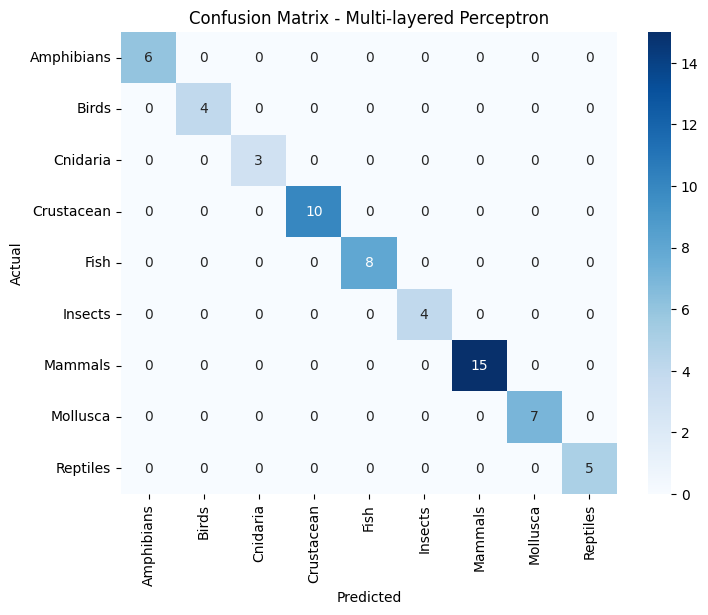

In [41]:
evaluate_model(MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500), "Multi-layered Perceptron")

## Unsupervised Learning
### k-Means Clustering

### k-Means and Self-Organizing Map for Data Visualization